In [29]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Data preparation

In [30]:
# load AOI dataset
gdf_aoi = gpd.read_file("20200703_demo_grid_aoi.geojson")

In [31]:
gdf_aoi.shape

(1, 20)

In [32]:
# load tree dataset
gdf_tree = gpd.read_file("20200703_single_tree_berlin_excerpt.geojson")

In [33]:
gdf_tree.shape

(33225, 10)

In [34]:
# convert treetop diam, tree height, year of planting columns into numeric

gdf_tree["treetop_diam"] = pd.to_numeric(gdf_tree["treetop_diam"], errors="coerce")
gdf_tree["tree_height"] = pd.to_numeric(gdf_tree["tree_height"], errors="coerce")
gdf_tree["year_of_planting"] = pd.to_numeric(gdf_tree["year_of_planting"], errors="coerce")

In [35]:
# create "age"-column calculated by actual year (2020) and column "year_of_planting"
gdf_tree["age"]= 2020 - gdf_tree["year_of_planting"]

gdf_tree.head()

,id,genus,name_german,name_original,treetop_diam,tree_height,year_of_planting,license,credits,geometry,age
0,3175201,Tilia,Winter-Linde,Tilia cordata,3.0,7.0,1998.0,Deutschland Namensnennung 2.0,Land Berlin,POINT (13.54829 52.52697),22.0
1,3175214,Elaeagnus,None,Picea pungens 'Glauca',5.0,7.0,1991.0,Deutschland Namensnennung 2.0,Land Berlin,POINT (13.56128 52.54016),29.0
2,3175218,Acer,Spitz-Ahorn,Acer platanoides,7.0,7.0,1985.0,Deutschland Namensnennung 2.0,Land Berlin,POINT (13.55523 52.54787),35.0
3,3175465,Populus,Simons Pappel,Populus simonii,11.0,17.0,1982.0,Deutschland Namensnennung 2.0,Land Berlin,POINT (13.55713 52.55021),38.0
4,3175700,Acer,Spitz-Ahorn,Acer platanoides,5.0,7.0,1996.0,Deutschland Namensnennung 2.0,Land Berlin,POINT (13.56698 52.53506),24.0


## Task 1

identifying trees inside the AOI.
Since _gpd.overlay()_ does not intersect polygons with points, _sjoin()_ was used to separate the data

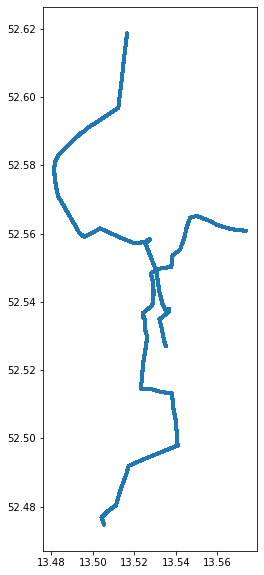

In [36]:
# join tree dataset points with AOI
join = gpd.sjoin(gdf_aoi, gdf_tree, how="inner", op="intersects")
join.plot(figsize=(10,10))
plt.show()

In [37]:
join.shape # check number of rows

(725, 31)

In [38]:
join.head()

,id_left,full_id,osm_id,osm_type,cables,frequency,gez,layer,name,operator,...,id_right,genus,name_german,name_original,treetop_diam,tree_height,year_of_planting,license,credits,age
0,1,w166885638,166885638,way,3,50,,,,Stromnetz Berlin,...,2903005,Prunus,Traubenkirsche,Pinus strobus,NaN,7.0,NaN,Deutschland Namensnennung 2.0,Land Berlin,NaN
0,1,w166885638,166885638,way,3,50,,,,Stromnetz Berlin,...,2878942,Malus,Holz-Apfel,Pinus sylvestris,NaN,5.0,NaN,Deutschland Namensnennung 2.0,Land Berlin,NaN
0,1,w166885638,166885638,way,3,50,,,,Stromnetz Berlin,...,2892059,Acer,Eschen-Ahorn,Acer negundo,NaN,17.0,NaN,Deutschland Namensnennung 2.0,Land Berlin,NaN
0,1,w166885638,166885638,way,3,50,,,,Stromnetz Berlin,...,2892062,Acer,Eschen-Ahorn,Acer negundo,8.0,15.0,NaN,Deutschland Namensnennung 2.0,Land Berlin,NaN
0,1,w166885638,166885638,way,3,50,,,,Stromnetz Berlin,...,2904980,Gleditsia,Amerikanische Gleditschie,Gleditsia triacanthos,5.0,17.0,NaN,Deutschland Namensnennung 2.0,Land Berlin,NaN


In [39]:
gdf_tree.columns

Index(['id', 'genus', 'name_german', 'name_original', 'treetop_diam',
       'tree_height', 'year_of_planting', 'license', 'credits', 'geometry',
       'age'],
      dtype='object')

In [40]:
# separate trees outside the AOI from main tree dataset
trees_outside_AOI = gdf_tree[~gdf_tree['id'].isin(join['id_right'])] 
trees_outside_AOI.shape

(32500, 11)

In [41]:
# determine trees inside AOI
trees_inside_AOI = gdf_tree[gdf_tree["id"].isin(join["id_right"])]
trees_inside_AOI.shape

(725, 11)

**There are 725 trees inside the AOI**

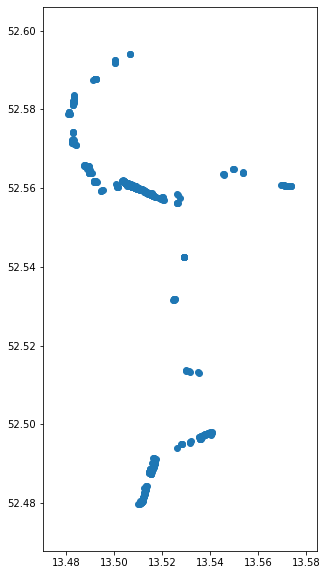

In [42]:
#plot the location of the trees inside the AOI
trees_inside_AOI.plot(figsize=(10,10))
plt.show()

## Task 2

Calculate Mean, Std, Median for tree_height, treetop_diam, age

In [43]:
# in AOI treetop_diam
print("mean of treetop_diam inside AOI: ",trees_inside_AOI["treetop_diam"].mean())
print("median of treetop_diam inside AOI: ",trees_inside_AOI["treetop_diam"].median())
print("standard dev of treetop_diam inside AOI: ",trees_inside_AOI["treetop_diam"].std())
print("____________________________")
# in AOI height
print("mean of tree_height inside AOI: ",trees_inside_AOI["tree_height"].mean())
print("median of tree_height inside AOI: ",trees_inside_AOI["tree_height"].median())
print("standard dev of tree_height inside AOI: ",trees_inside_AOI["tree_height"].std())
print("____________________________")
# in AOI age
print("mean of age inside AOI: ",trees_inside_AOI["age"].mean())
print("median of age inside AOI: ",trees_inside_AOI["age"].median())
print("standard dev of age inside AOI: ",trees_inside_AOI["age"].std())
print("____________________________")
# outside AOI treetop_diam
print("mean of treetop_diam outside AOI: ",trees_outside_AOI["treetop_diam"].mean())
print("median of treetop_diam outside AOI: ",trees_outside_AOI["treetop_diam"].median())
print("standard dev of treetop_diam outside AOI: ",trees_outside_AOI["treetop_diam"].std())
print("____________________________")
# outside AOI height
print("mean of tree_height outside AOI: ",trees_outside_AOI["tree_height"].mean())
print("median of tree_height outside AOI: ",trees_outside_AOI["tree_height"].median())
print("standard dev of tree_height outside AOI: ",trees_outside_AOI["tree_height"].std())
print("____________________________")
# outside AOI age
print("mean of age outside AOI: ",trees_outside_AOI["age"].mean())
print("median of age outside AOI: ",trees_outside_AOI["age"].median())
print("standard dev of age outside AOI: ",trees_outside_AOI["age"].std())

mean of treetop_diam inside AOI:  5.652958152958153
median of treetop_diam inside AOI:  5.0
standard dev of treetop_diam inside AOI:  2.4864623161034163
____________________________
mean of tree_height inside AOI:  12.32551724137931
median of tree_height inside AOI:  12.0
standard dev of tree_height inside AOI:  5.851898913961083
____________________________
mean of age inside AOI:  39.74792703150912
median of age inside AOI:  35.0
standard dev of age inside AOI:  17.84390070044359
____________________________
mean of treetop_diam outside AOI:  5.898360603246774
median of treetop_diam outside AOI:  5.0
standard dev of treetop_diam outside AOI:  3.591145299445828
____________________________
mean of tree_height outside AOI:  11.67966049382716
median of tree_height outside AOI:  10.0
standard dev of tree_height outside AOI:  6.835936555390318
____________________________
mean of age outside AOI:  39.428951769805785
median of age outside AOI:  35.0
standard dev of age outside AOI:  24.575

In [44]:
# overview of basic statistics
# Median = row "50%"
trees_inside_AOI.describe()

,treetop_diam,tree_height,year_of_planting,age
count,693.000000,725.000000,603.000000,603.000000
mean,5.652958,12.325517,1980.252073,39.747927
std,2.486462,5.851899,17.843901,17.843901
min,1.000000,2.000000,1890.000000,2.000000
25%,4.000000,7.000000,1970.000000,30.000000
50%,5.000000,12.000000,1985.000000,35.000000
75%,7.000000,17.000000,1990.000000,50.000000
max,18.000000,45.000000,2018.000000,130.000000


In [45]:
trees_outside_AOI.describe()

,treetop_diam,tree_height,year_of_planting,age
count,31231.000000,32400.000000,29297.000000,29297.000000
mean,5.898361,11.679660,1980.571048,39.428952
std,3.591145,6.835937,24.575478,24.575478
min,1.000000,1.000000,1068.000000,1.000000
25%,4.000000,7.000000,1970.000000,23.000000
50%,5.000000,10.000000,1985.000000,35.000000
75%,8.000000,15.000000,1997.000000,50.000000
max,38.000000,89.000000,2019.000000,952.000000


## Task 3

determine most abundant genus 

In [46]:
genus_outside_AOI = trees_outside_AOI["genus"].value_counts(dropna = False)
top_genus_outside_AOI = genus_outside_AOI.head(1)
print(top_genus_outside_AOI)

genus_inside_AOI = trees_inside_AOI["genus"].value_counts(dropna = False)
top_genus_inside_AOI = genus_inside_AOI.head(1)
print(top_genus_inside_AOI)

Acer    8443
Name: genus, dtype: int64
Acer    252
Name: genus, dtype: int64


**The most abundant genus outside the AOI is Acer with 8443 trees**

**The most abundant genus inside the AOI is Acer with 252 trees**

## Task 4

plot correlation between age and tree height

In [47]:
# removing NaN values
trees_inside_AOI["age"].isna().sum() # identify nan
trees_inside_AOI_not_nan = trees_inside_AOI[lambda x: x['age'].notnull()]

In [48]:
print(trees_outside_AOI["tree_height"].isna().sum())
trees_outside_AOI_not_nan = trees_outside_AOI[lambda x: x["age"].notnull() & x["tree_height"].notnull()]
print(trees_outside_AOI_not_nan["tree_height"].isna().sum())
print(trees_outside_AOI_not_nan.shape)

100
0
(29268, 11)


In [49]:
import numpy as np

x = trees_inside_AOI_not_nan['age']
y = trees_inside_AOI_not_nan["tree_height"]
coef_in = np.corrcoef(x,y)
print("Correlation coefficient is: ", coef_in[0][1])

Correlation coefficient is:  0.5126036551638135


In [50]:
x0 = trees_outside_AOI_not_nan["age"]
y0 = trees_outside_AOI_not_nan["tree_height"]
coef_out = np.corrcoef(x0,y0)
print("Correlation coefficient is: ", coef_out[0][1])

Correlation coefficient is:  0.6672077126830828


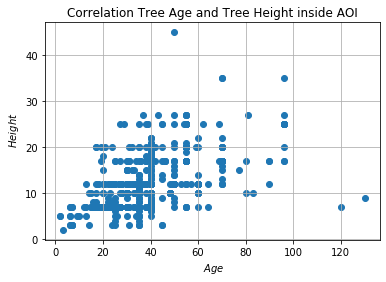

In [51]:
# plot correlation between trees inside AOI with removed NaN values
plt.scatter(x,y)

plt.xlabel('$\ Age$')
plt.ylabel('$\ Height$')
plt.grid()
plt.title("Correlation Tree Age and Tree Height inside AOI")
plt.show()

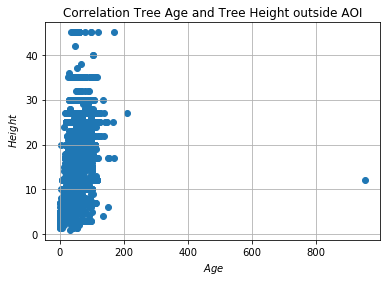

In [52]:
# plot correlation between age and height of trees outside of AOI with removed NaN values
plt.scatter(x0,y0)

plt.xlabel('$\ Age$')
plt.ylabel('$\ Height$')
plt.grid()
plt.title("Correlation Tree Age and Tree Height outside AOI")
plt.show()

In [53]:
# removing outlier
trees_outside_AOI_filtered = trees_outside_AOI_not_nan[trees_outside_AOI_not_nan["age"] < 900]
trees_outside_AOI_filtered.shape # to check if value was removed

(29267, 11)

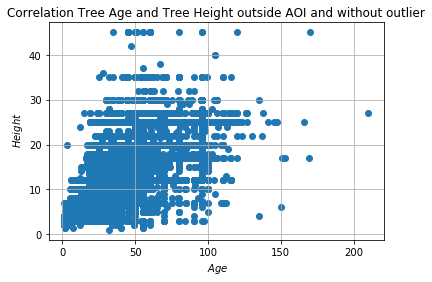

In [54]:
# plot without outlier
x1 = trees_outside_AOI_filtered["age"]
y1 = trees_outside_AOI_filtered["tree_height"]
plt.scatter(x1,y1)

plt.xlabel('$\ Age$')
plt.ylabel('$\ Height$')
plt.grid()
plt.title("Correlation Tree Age and Tree Height outside AOI and without outlier")
plt.show()